<a href="https://colab.research.google.com/github/DilyaraKayumovna/-/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%94%D0%98_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [ ]:
delta = 3
dispersia = 225
sigma = 15
beta = 0.95

In [ ]:
alpha = 1 - beta  #нашли уровень значимости
alpha

0.050000000000000044

In [ ]:
# нашли квантиль нормального распределения уровня
1 - alpha / 2

0.975

In [ ]:
Z = 2.241 #нашли по таблице для двусторонней области

In [ ]:
n = int(((sigma * Z) / delta)**2)
n

125

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [ ]:
n = 25
x_mean = 130
sigma = 15
alpha = 0.02

In [ ]:
1 - alpha/2

0.99

In [ ]:
Z = 2.576

In [ ]:
delta = (sigma * Z) / n ** 0.5
delta

7.728

In [ ]:
L = int((x_mean + delta) - (x_mean - delta))
L

15

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

In [ ]:
t, p_value = stats.ttest_ind(mens, womens) # считаем Критерий Стьюдента (t-test)
t, p_value

(3.6635841716708892, 0.00024875321033580573)

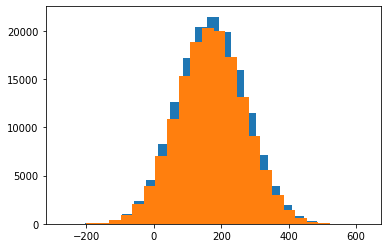

In [ ]:
plt.hist(mens, bins=25); #Выборка A
plt.hist(womens, bins=25);  #Выборка B

In [ ]:
#значение p_value = 0,0002, что меньше уровня значимости (0,001), следовательно,
#отвергаем нулевую гипотезу о том, что нет различий. Но по графику различия не сильно выражены

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [ ]:
sigma = 150
beta = 0.95
delta = 50

In [ ]:
alpha = 1 - beta 
alpha

0.050000000000000044

In [ ]:
1 - alpha/2

0.99

In [ ]:
Z = 2.576

In [ ]:
n = int(((sigma * Z) / delta)**2)
n

59

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [ ]:
import pandas as pd

In [ ]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [ ]:
import scipy.stats as stats

oddsratio, pvalue = stats.fisher_exact(observations) #тест Фишера
oddsratio, pvalue


(0.5811965811965812, 0.35417955365927367)

In [ ]:
# pvalue=0,35, что больше уровня значимости (0,05), значит, нулевую гипотезу нельзя отвергнуть (события случайны)
# маг не умеет предсказывать погоду

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]


In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  
    return m-h, m, m+h 

In [ ]:
print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

In [ ]:
tvalue, pvalue = stats.ttest_ind(A, B)
print('t_value:',tvalue, '_pvalue: ',pvalue)

t_value: 11.865233896372924 _pvalue:  4.623319592204015e-25


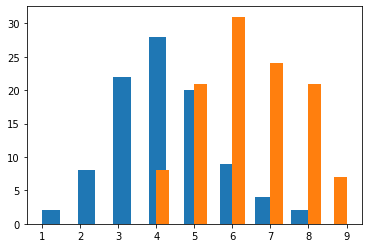

In [ ]:
plt.hist(B, bins=15);
plt.hist(A, bins=15);

In [ ]:
# по графику видно, что выборки различны.
# pvalue очень низкое, значит, выборки различны

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
# p-value меньше 0,05, значит, отвергаем нулевую гипотезу о том, что распределение нормальное. 
# вывод: распределение Ненормальное

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

In [ ]:
 t, p_value = stats.ttest_ind(A, B) 
t, p_value

(-1.95300880485141, 0.051284593140469285)

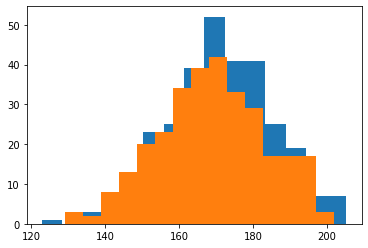

In [ ]:
plt.hist(B, bins=15);
plt.hist(A, bins=15);

In [ ]:
# pvalue=0,051, что больше уровня значимости (0,05), следовательно, эффективность препаратов случайна
# при pvalue<0,05(минимум 0,04), различия были бы значимы